## Análisis exploratorio de la demanda

* Explorar características de los prestadores:
  1. Que tipo de prestadores.Ejemplo :Clinico,Cardiologo...etc
  2. Que tipo de atencion realizo. Ejemplo: Online, presencial
  3. Ver tipo de calificaciones de la
  

* Explorar consumos. Analizar su distribución
  1. Ver especialidad y consumos
  2. 

In [1]:
import io
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('.\Data\Dataset_oferta.csv',sep=';')
df.head()


,id_prestador_encoded,especialidad_prestador_encoded,descripcion_practica_encoded,Q consumos,Promedio calificacion recibida
0,200030,CLINICA MEDICA,ATENCION ON LINE COVID19,1,2
1,200123,CLINICA MEDICA,ATENCION ON LINE COVID19,1,3
2,200133,CLINICA MEDICA,ATENCION ON LINE COVID19,1,3
3,200137,CLINICA MEDICA,ATENCION ON LINE COVID19,1,2
4,200167,CLINICA MEDICA,ATENCION ON LINE COVID19,1,1


In [3]:
df.info()
print('Numero de filas,columans',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_prestador_encoded            196 non-null    int64 
 1   especialidad_prestador_encoded  196 non-null    object
 2   descripcion_practica_encoded    196 non-null    object
 3   Q consumos                      196 non-null    int64 
 4   Promedio calificacion recibida  196 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.8+ KB
Numero de filas,columans (196, 5)


In [4]:
df.describe()

,id_prestador_encoded,Q consumos
count,196.00000,196.000000
mean,200097.50000,12.755102
std,56.72448,16.324945
min,200000.00000,1.000000
25%,200048.75000,3.000000
50%,200097.50000,7.000000
75%,200146.25000,17.000000
max,200195.00000,101.000000


In [5]:
df.isnull().sum()

id_prestador_encoded              0
especialidad_prestador_encoded    0
descripcion_practica_encoded      0
Q consumos                        0
Promedio calificacion recibida    0
dtype: int64

1- Ver especialidades de los prestadores

C:\Users\silvi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


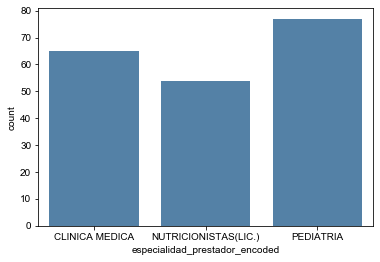

In [6]:
sns.countplot(df.especialidad_prestador_encoded, color='steelblue')
sns.set(style="darkgrid")

In [7]:
pd.crosstab(df.descripcion_practica_encoded , df.especialidad_prestador_encoded)

especialidad_prestador_encoded,CLINICA MEDICA,NUTRICIONISTAS(LIC.),PEDIATRIA
descripcion_practica_encoded,,,
ATENCION ON LINE COVID19,65,54,77


Text(0, 0.5, 'Especilidad_Medica')

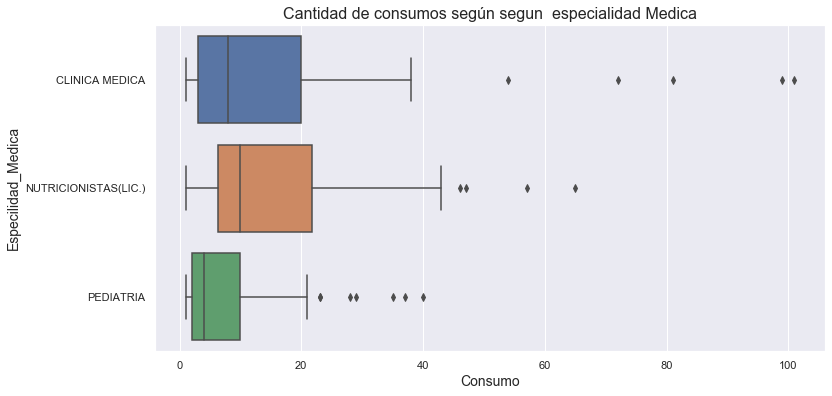

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=df['Q consumos'], y=df.especialidad_prestador_encoded)
plt.title('Cantidad de consumos según segun  especialidad Medica', size=16)
plt.xlabel('Consumo', size=14)
plt.ylabel('Especilidad_Medica', size=14)

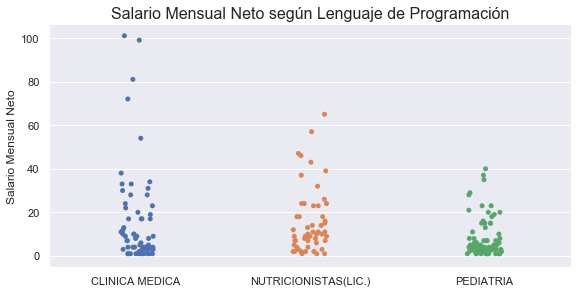

In [9]:
sns.catplot(data=df, y='Q consumos',
                x='especialidad_prestador_encoded', height=4, aspect=2)
plt.title('Salario Mensual Neto según Lenguaje de Programación', size=16)
plt.xlabel('')
plt.ylabel('Salario Mensual Neto')
sns.despine()

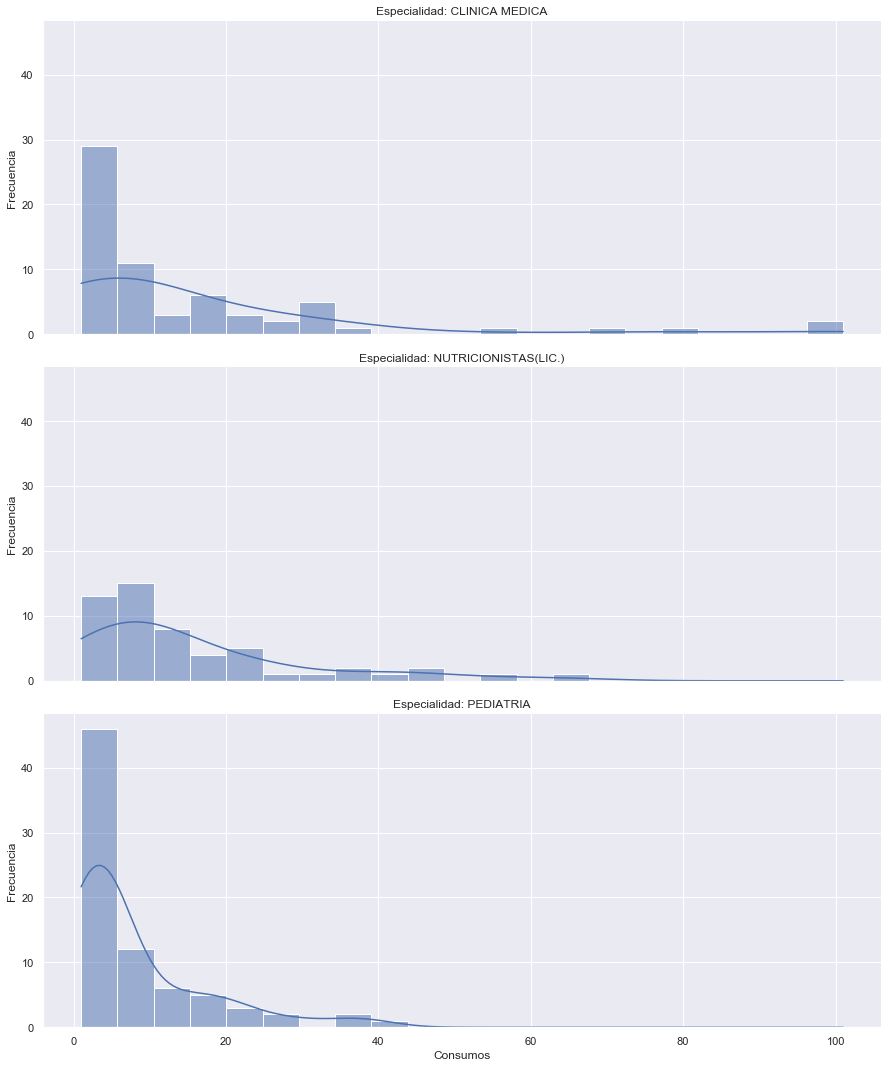

In [26]:
g =sns.displot(df, x="Q consumos", row="especialidad_prestador_encoded", aspect=2.5, kde=True)
g.set_axis_labels("Consumos", "Frecuencia")
g.set_titles(row_template="Especialidad: {row_name}")

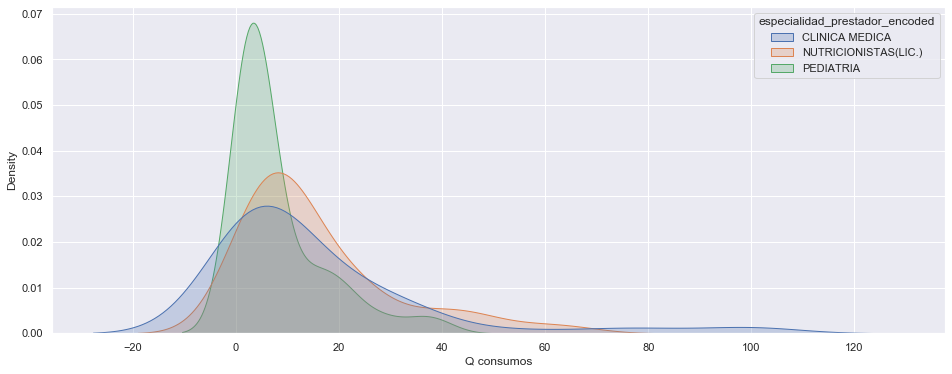

In [24]:
plt.figure(figsize=(16, 6))
sns.kdeplot(data=df, x="Q consumos", hue="especialidad_prestador_encoded", common_norm=False, shade=True)
plt.show()